In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Sigmoid Function

In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [4]:
print(sigmoid(5))

0.9933071490757153


In [5]:
print(sigmoid(-5))

0.0066928509242848554


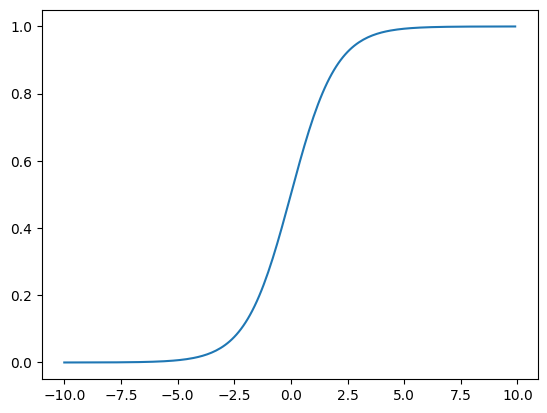

In [6]:
x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
plt.plot(x,y)

# Loss Function for 1 data point

In [28]:
def log_loss(y_actual, y_predict):
    """
    y_actual = Actual label => {0, 1}
    y_predict = Predicted probability => (0, 1)
    """

    loss= y_actual*np.log(y_predict) + (1-y_actual)*np.log(1-y_predict)

    return -loss

In [31]:
print(log_loss(1, 0.0001)) # High error

9.210340371976182


In [33]:
print(log_loss(1, 0.9866)) # Low error

0.013490590182499144


# Logistic Regression on Churn dataset

In [9]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /Volumes/Additional Drive/Projects/Logistic-Regression/churn_logistic.csv
100%|████████████████████████████████████████| 494k/494k [00:00<00:00, 2.54MB/s]


In [10]:
df = pd.read_csv("churn_logistic.csv")
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [11]:
df.shape

(5700, 21)

In [12]:
# We will choose 5 features for our logistic regression which we selected using simple EDA here:
# https://colab.research.google.com/drive/1Rp9tVnqg3xifVR4sqBRQ0cESogkmFXLe?usp=sharing

In [13]:
cols = ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']
y = df['Churn']
y = np.array(y).reshape(len(y), 1) #Reshaping output data to (m,1) shape
X = df[cols]

In [14]:
X.shape, y.shape

((5700, 5), (5700, 1))

In [15]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

X_train.shape

(3420, 5)

In [16]:
X_val.shape

(1140, 5)

In [17]:
X_train.head()

,Day Mins,Eve Mins,Night Mins,CustServ Calls,Account Length
571,74.3,177.3,296.3,2,186
83,249.5,259.7,222.7,1,70
2806,220.4,211.2,259.3,2,13
4534,130.7,260.6,244.2,2,92
5653,131.6,211.3,168.3,4,167


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [20]:
print(model.coef_, model.intercept_)

[[0.68445262 0.29104301 0.1363756  0.79630985 0.06125924]] [-0.01220319]


In [21]:
y_val_pred = model.predict(X_val)
y_val_pred

array([1, 0, 1, ..., 1, 0, 0])

In [22]:
# Model Accuracy => Manual way
y_val_pred = y_val_pred.reshape(-1, 1)
np.mean(y_val == y_val_pred)            

np.float64(0.6982456140350877)

In [23]:
# Model Accuracy => Sklearn
model.score(X_val, y_val) 

0.6982456140350877

# Inference for one data point

In [24]:
x_query = np.array([85, 200, 150, 4, 95])
x_query

array([ 85, 200, 150,   4,  95])

In [26]:
x_query = scaler.transform([x_query])

In [27]:
model.predict(x_query)

array([0])

# Hyperparameter tuning

In [34]:
from sklearn.pipeline import make_pipeline

train_scores = []
val_scores = []

for lam in np.arange(0.01, 5000.0, 100): # range of values of Lambda
  model = make_pipeline(StandardScaler(), LogisticRegression(C=1/lam))
  model.fit(X_train, y_train)

  train_score = model.score(X_train, y_train)
  val_score = model.score(X_val, y_val)

  train_scores.append(train_score)
  val_scores.append(val_score)

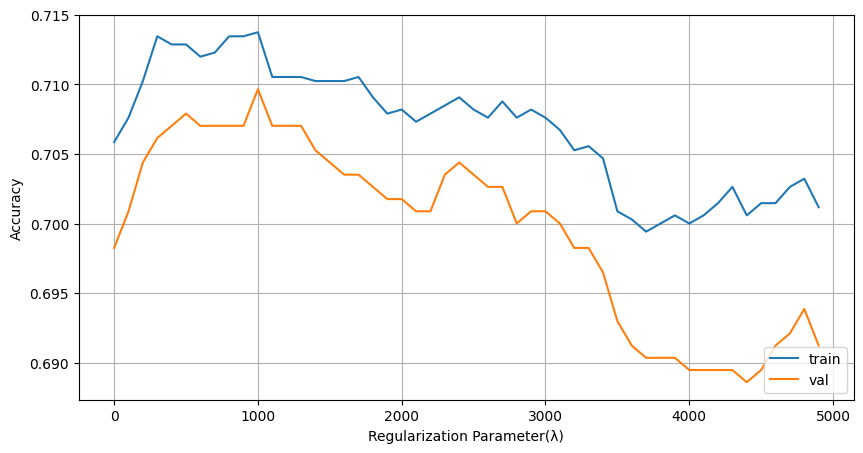

In [35]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [49]:
# Finding best lambda

best_idx = np.argmax(val_scores)
best_lambda = np.arange(0.01, 5000.0, 100)[best_idx]
best_val_score = val_scores[best_idx]

print("Best λ:", best_lambda)
print("Validation Accuracy:", best_val_score)

Best λ: 1000.01
Validation Accuracy: 0.7096491228070175


In [50]:
# Model accuracy with best lambda

model = LogisticRegression(C=1/1000)
model.fit(X_train, y_train)

print("Train acc = ",model.score(X_train, y_train))
print("Val acc = ",model.score(X_val, y_val))

Train acc =  0.7137426900584796
Val acc =  0.7096491228070175


# Multiclass Classification

In [80]:
# dataset creation with 3 classes
from sklearn.datasets import make_classification

X, y = make_classification(n_samples= 500,
                           n_features= 2,
                           n_classes = 3,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=1)

In [81]:
X.shape, y.shape

((500, 2), (500,))

In [86]:
y[0:15]

array([1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0])

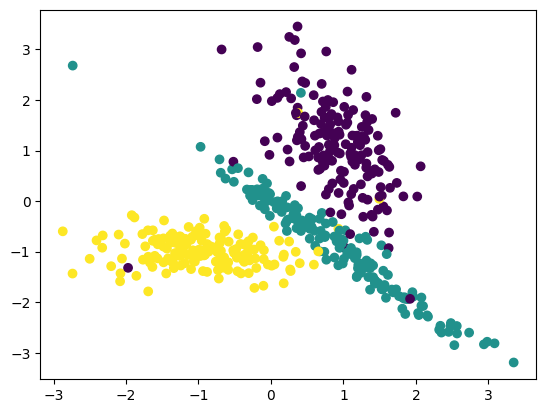

In [82]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

In [87]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(300, 2)

In [88]:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'ovr'


In [89]:
y_pred = model.predict(X_val)
y_pred[:20]

array([1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0])

In [90]:
print(f'Training Accuracy:{model.score(X_train,y_train)}')
print(f'Validation Accuracy :{model.score(X_val,y_val)}')

Training Accuracy:0.9166666666666666
Validation Accuracy :0.92


In [92]:
model.predict_proba(X_val).round(2)[:10] # Probabilities for each class

array([[0.05, 0.84, 0.1 ],
       [0.12, 0.76, 0.12],
       [0.96, 0.04, 0.  ],
       [0.82, 0.18, 0.  ],
       [0.  , 0.19, 0.81],
       [0.15, 0.67, 0.18],
       [0.81, 0.19, 0.  ],
       [0.51, 0.48, 0.01],
       [0.26, 0.72, 0.02],
       [0.53, 0.46, 0.  ]])

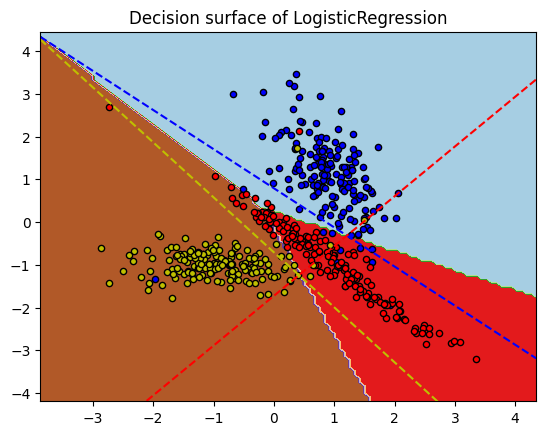

In [94]:
from sklearn.inspection import DecisionBoundaryDisplay

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict", cmap=plt.cm.Paired, ax=ax)
plt.title("Decision surface of LogisticRegression")
plt.axis("tight")

# Plot also the training points
colors = "bry"
for i, color in zip(model.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )


# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = model.coef_
intercept = model.intercept_

def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(model.classes_, colors):
        plot_hyperplane(i, color)

plt.show()